In [6]:
import pandas as pd
import os

In [7]:
!pip install matplotlib
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv('google_stock_price.csv')
df.head(n=10)

Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512
5  2004-08-26  2.613952  2.688672  2.606729  2.687676   2.687676  142572401
6  2004-08-27  2.692408  2.705360  2.632383  2.643840   2.643840  124826132
7  2004-08-30  2.622171  2.627402  2.540727  2.540727   2.540727  104429967
8  2004-08-31  2.547950  2.583068  2.544463  2.549693   2.549693   98825037
9  2004-09-01  2.557912  2.564637  2.482445  2.496891   2.496891  183633734

In [9]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
4837  2023-11-06  130.220001  131.559998  129.929993  131.449997  131.449997   
4838  2023-11-07  131.979996  133.279999  131.139999  132.399994  132.399994   
4839  2023-11-08  132.360001  133.539993  132.160004  133.259995  133.259995   
4840  2023-11-09  133.360001  133.960007  131.509995  131.690002  131.690002   
4841  2023-11-10  131.529999  134.270004  130.869995  134.059998  134.059998   

        Volume  
4837  15360400  
4838  19223800  
4839  15093600  
4840  17976500  
4841  20872900

[Text(0.5, 1.0, 'Volume of Stocks Trend')]

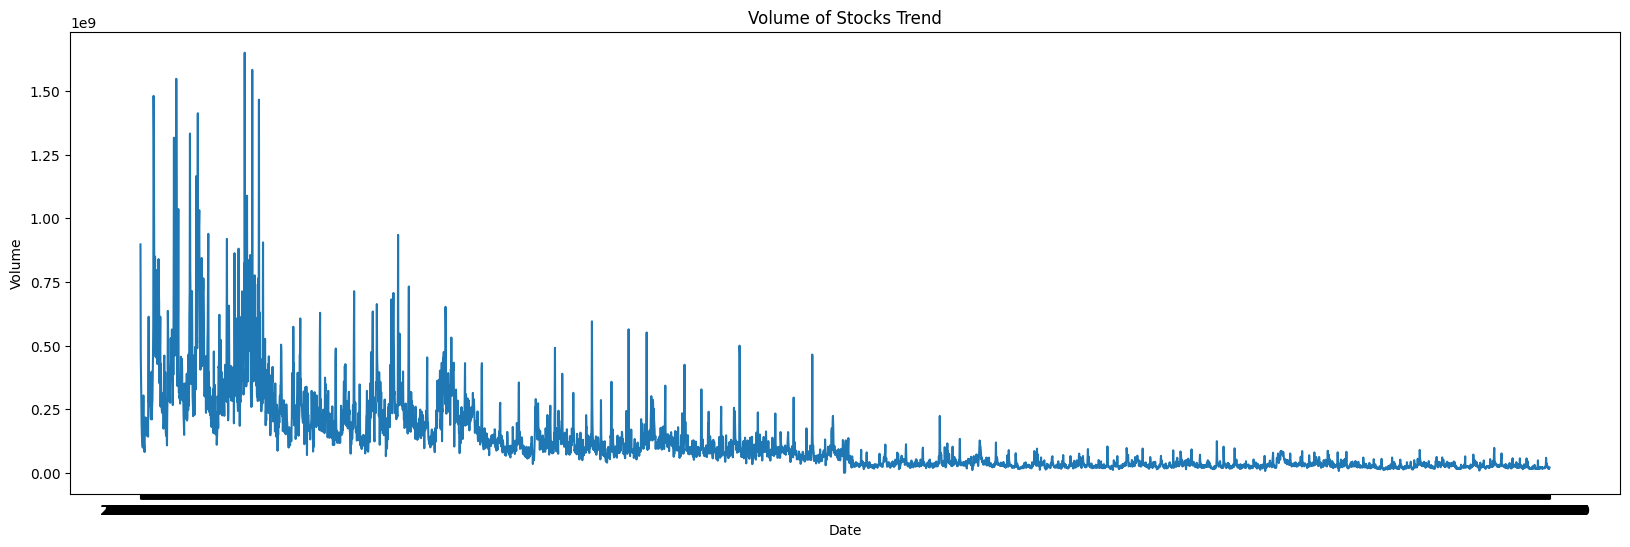

In [10]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.lineplot(x=df['Date'],y=df['Volume'],data=df).set(title='Volume of Stocks Trend')

In [11]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
for column in df.columns:
    print(f'{column} has {df[column].nunique()} unique elements.')

Date has 4842 unique elements.
Open has 4699 unique elements.
High has 4697 unique elements.
Low has 4728 unique elements.
Close has 4751 unique elements.
Adj Close has 4751 unique elements.
Volume has 4731 unique elements.


In [13]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

[Text(0.5, 1.0, 'Closing Price of Stocks Trend')]

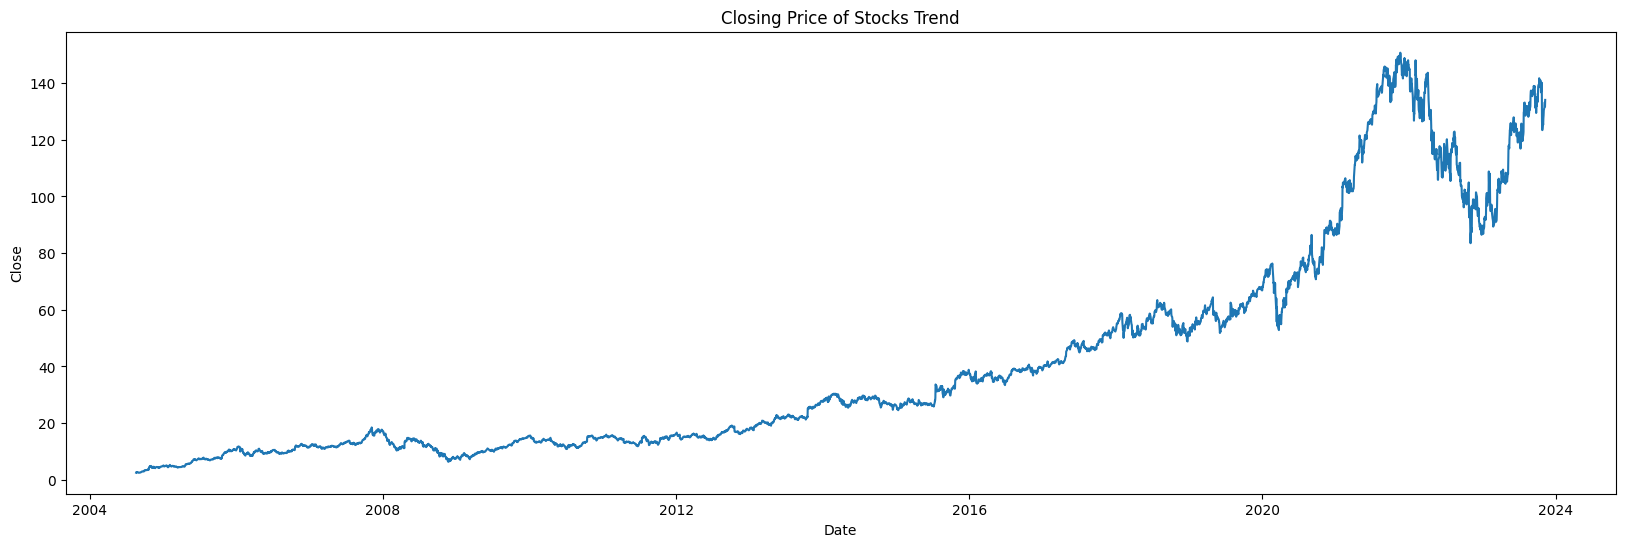

In [14]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df['Date'], y=df['Close'],data=df).set(title='Closing Price of Stocks Trend')

[Text(0.5, 1.0, 'Opening Price of Stocks Trend')]

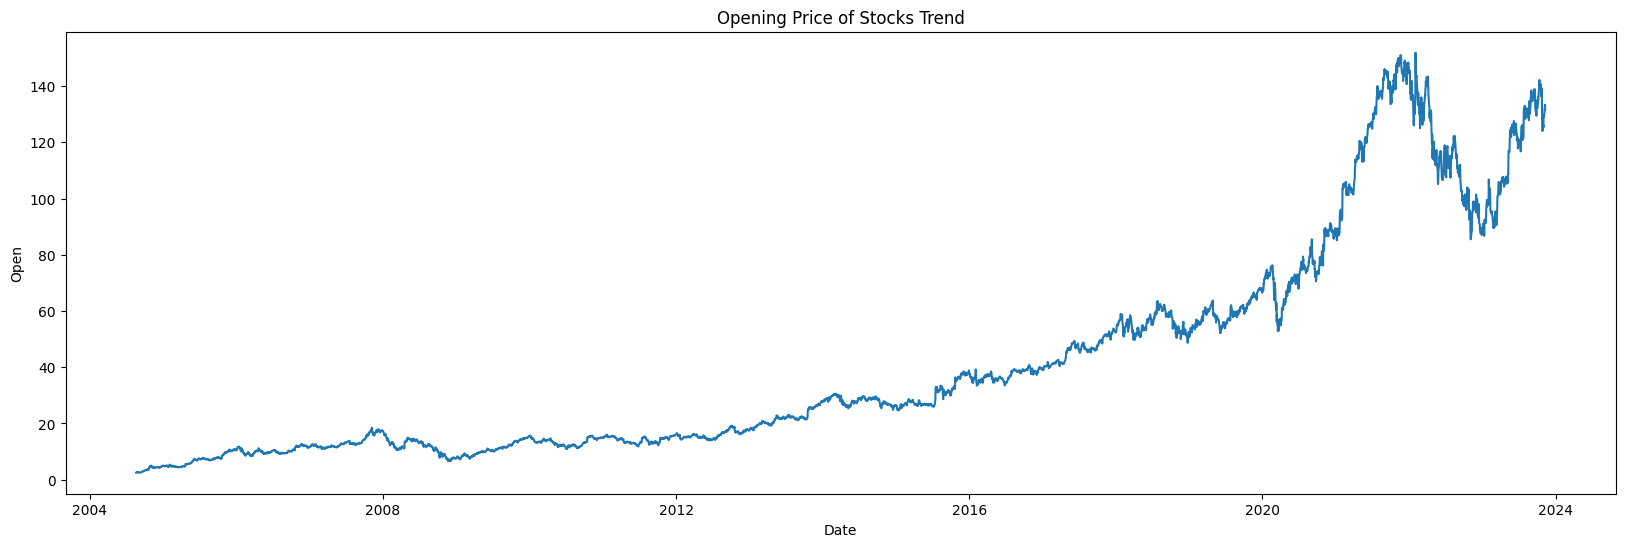

In [15]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df['Date'], y=df['Open'],data=df).set(title='Opening Price of Stocks Trend')

[Text(0.5, 1.0, 'Opening & Closing Price difference of Stocks Trend')]

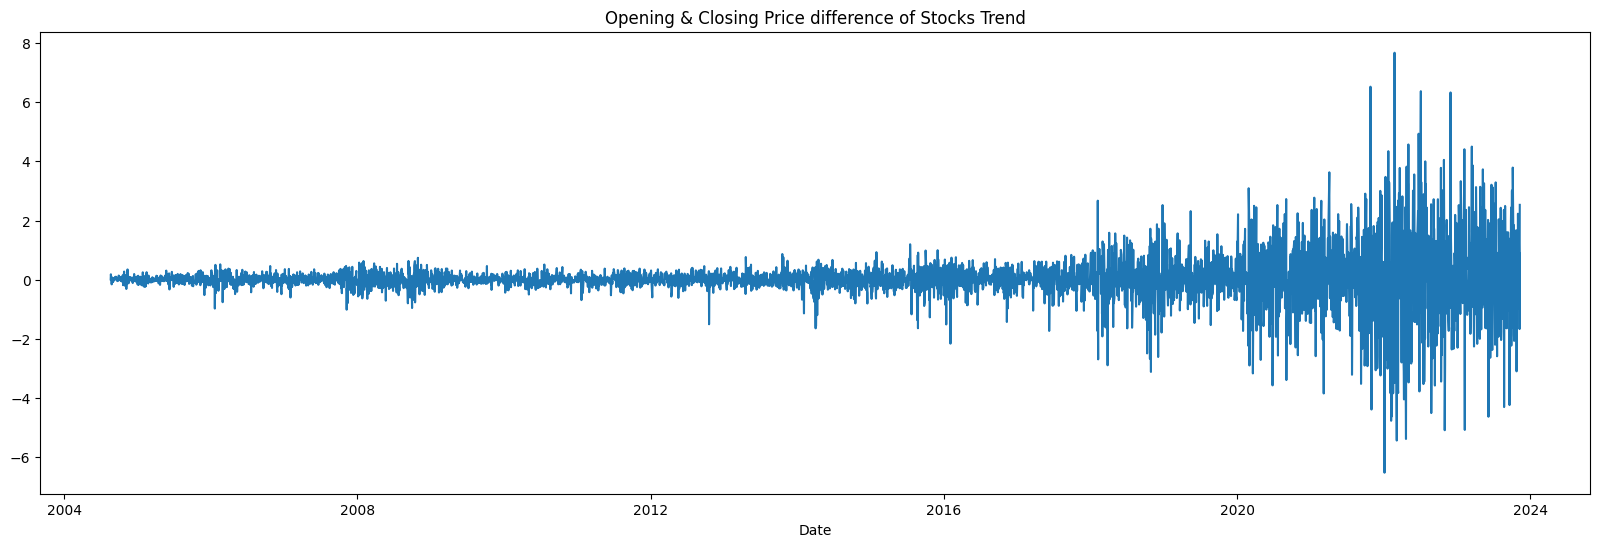

In [16]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df['Date'], y=df['Close']-df['Open'],data=df).set(title='Opening & Closing Price difference of Stocks Trend')

In [17]:
print('Null Value Present: ', df.isnull().values.any())

Null Value Present:  False


In [18]:
df.set_index('Date')
df['High-Low']=df['High']-df['Low']
df['Open-Close']=df['Open']-df['Close']

In [19]:
X=df[['Date','High-Low','Open-Close']].set_index('Date')
X.head()

High-Low  Open-Close
Date                            
2004-08-19  0.201743   -0.008469
2004-08-20  0.213699   -0.181819
2004-08-23  0.110336    0.033624
2004-08-24  0.200000    0.158655
2004-08-25  0.102616   -0.025903

In [20]:
import numpy as np

In [21]:
Y=np.where(df['Close'].shift(-1)>df['Close'],'Buy','Sell')

In [22]:
Y

array(['Buy', 'Buy', 'Sell', ..., 'Sell', 'Buy', 'Sell'], dtype='<U4')

In [25]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25)


   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.2 MB 650.2 kB/s eta 0:00:15
    --------------------------------------- 0.1/9.2 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.2 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.2 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.2 MB 3.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.2 MB 3.8 MB/s eta 0:00:03
   ------- -------------------------------- 1.7/9.2 MB 5.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.3/9.2 MB 5.9 MB/s eta 0:00:02
   ------------ --------------------------- 3.0/9.2 MB 6.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.6/9.2 MB 7.4 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/9.2 MB 8.0 MB/s eta 0:00:01
   ---------------------

In [26]:
print(list(range(2,15)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {'n_neighbors':list(range(2,15))}
knn = neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5)

In [28]:
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14]})

In [29]:
accuracy_train=accuracy_score(y_train,model.predict(X_train))
accuracy_test=accuracy_score(y_test,model.predict(X_test))

In [30]:
print(accuracy_train, accuracy_test)

0.6893417791242082 0.5119735755573905


In [31]:
!pip install yfinance
import yfinance as yf

In [32]:
moving_avg_100 = df.Close.rolling(100).mean()

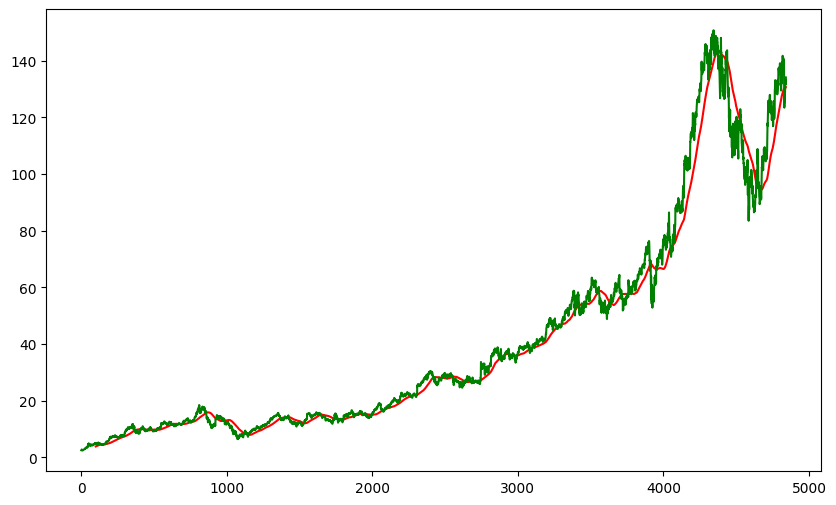

In [33]:
plt.figure(figsize=(10,6))
plt.plot(moving_avg_100, 'r')
plt.plot(df.Close,'g')
plt.show()

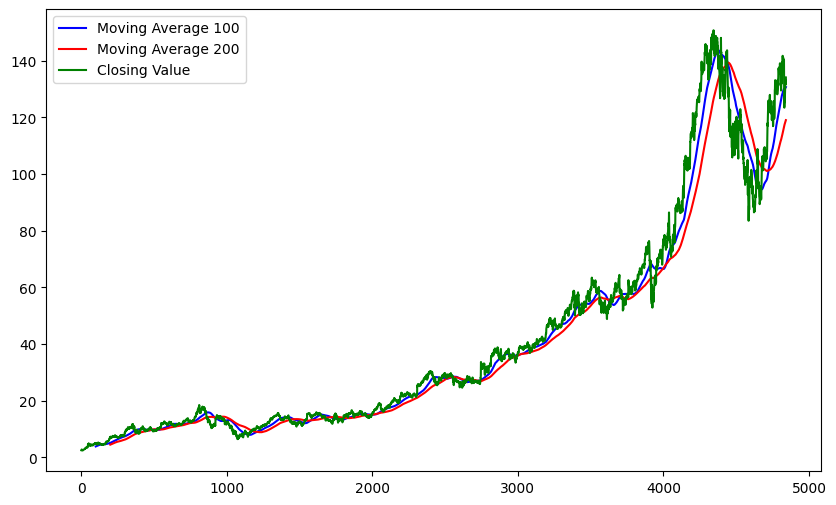

In [34]:
moving_avg_200 = df.Close.rolling(200).mean()
plt.figure(figsize=(10,6))
plt.plot(moving_avg_100, 'b', label='Moving Average 100')
plt.plot(moving_avg_200, 'r',  label='Moving Average 200')
plt.plot(df.Close,'g',  label='Closing Value')
plt.legend()
plt.show()


In [35]:
train_data = pd.DataFrame(df.Close[:int(len(df)*0.8)])
test_data=pd.DataFrame(df.Close[int(len(df)*0.80):])                                   

In [36]:
len(test_data)

969

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [38]:
data_train_scale = scaler.fit_transform(train_data)

In [39]:
data_train_scale.shape[0]

3873

In [40]:
data_train_scale.shape

(3873, 1)

In [41]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [47]:
x,y=np.array(x), np.array(y)

In [42]:
!pip install tensorflow

In [43]:
import tensorflow
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [50]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences =True , input_shape=((x.shape[1],1)) ))

model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu',return_sequences =True))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [51]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [52]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50

118/118 [==============================] - 28s 185ms/step - loss: 0.0748
Epoch 2/50
118/118 [==============================] - 20s 166ms/step - loss: 0.0661
Epoch 3/50
118/118 [==============================] - 21s 176ms/step - loss: 0.0654
Epoch 4/50
118/118 [==============================] - 20s 173ms/step - loss: 0.0650
Epoch 5/50
118/118 [==============================] - 20s 171ms/step - loss: 0.0644
Epoch 6/50
118/118 [==============================] - 20s 171ms/step - loss: 0.0646
Epoch 7/50
118/118 [==============================] - 20s 173ms/step - loss: 0.0643
Epoch 8/50
118/118 [==============================] - 23s 199ms/step - loss: 0.0640
Epoch 9/50
118/118 [==============================] - 27s 230ms/step - loss: 0.0640
Epoch 10/50
118/118 [==============================] - 24s 207ms/step - loss: 0.0637
Epoch 11/50
118/118 [==============================] - 24s 203ms/step - loss: 0.0637
Epoch 12/50
118/118 [==============================] - 21s 182ms/step - l

In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 120)         